<div style="border:2px solid #e74c3c; background:#fdecea; color:#c0392b; padding:16px; border-radius:6px; font-size:1.2em; font-weight:bold; margin-bottom:18px;">
⚠️ <span style="color:#c0392b;">COMPATIBILITY 0.0.7</span>
</div>

# Tutorial 1: NIRS4All Beginner's Guide

Welcome to the NIRS4All framework! This tutorial will guide you through the fundamental concepts of Near-Infrared Spectroscopy (NIRS) data analysis, from basic regression to classification and prediction.

## What You'll Learn
1. **Basic PLS Regression** - Start with simple regression analysis
2. **Classification** - Convert to classification problems
3. **Model Persistence** - Save and reuse trained models
4. **Data Visualization** - Create meaningful plots and charts

## Prerequisites
- Basic understanding of machine learning concepts
- Python programming fundamentals
- Familiarity with spectroscopic data (helpful but not required)

Let's get started! 🚀

## Part 1: Simple PLS Regression

Partial Least Squares (PLS) regression is perfect for spectroscopic data because it handles high-dimensional, collinear data well. Let's start with a basic example.

### Step 1.1: Import Required Libraries

In [3]:
# Standard library imports
import matplotlib.pyplot as plt
import os

# Third-party imports
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler

# NIRS4All imports
from nirs4all.dataset import DatasetConfigs
from nirs4all.dataset.predictions import Predictions
from nirs4all.dataset.prediction_analyzer import PredictionAnalyzer
from nirs4all.operators.transformations import StandardNormalVariate, SavitzkyGolay
from nirs4all.pipeline import PipelineConfigs, PipelineRunner

# Optional: Enable emojis for more visual feedback
os.environ['DISABLE_EMOJIS'] = '0'

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


### Step 1.2: Configure Your First Pipeline

A pipeline in NIRS4All is a sequence of data processing steps. Let's build a simple one:

In [4]:
# Basic configuration
feature_scaler = MinMaxScaler()  # Normalizes spectral data to [0,1] range
target_scaler = MinMaxScaler()   # Normalizes target values
cross_validation = ShuffleSplit(n_splits=3, test_size=0.25)  # 3-fold CV with 25% test
data_path = 'sample_data/regression'  # Path to your NIRS data

# Simple pipeline: scale data → cross-validate → apply PLS model
simple_pipeline = [
    feature_scaler,
    "chart_3d",
    {"y_processing": target_scaler},
    cross_validation,
    {"model": PLSRegression(n_components=10), "name": "PLS-10"}
]

print("🔧 Pipeline configured with 4 steps:")
print("   1. Feature scaling (MinMaxScaler)")
print("   2. Target scaling (MinMaxScaler)")
print("   3. Cross-validation (3 folds)")
print("   4. PLS Regression (10 components)")

🔧 Pipeline configured with 4 steps:
   1. Feature scaling (MinMaxScaler)
   2. Target scaling (MinMaxScaler)
   3. Cross-validation (3 folds)
   4. PLS Regression (10 components)


### Step 1.3: Run Your First Pipeline

Now let's run the pipeline and see what happens:

🏃‍♂️ Running pipeline...
🚀 Starting Nirs4all run(s) with 1 pipeline on 1 dataset (1 total runs).
📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
🚀 Starting pipeline Tutorial_1_Simple_67aeb7 on dataset regression
------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
------------------------------------------------------------------------------------------------------------------------
Update: 📊 Dataset: regression (regression)
Features (samples=189, sources=1)

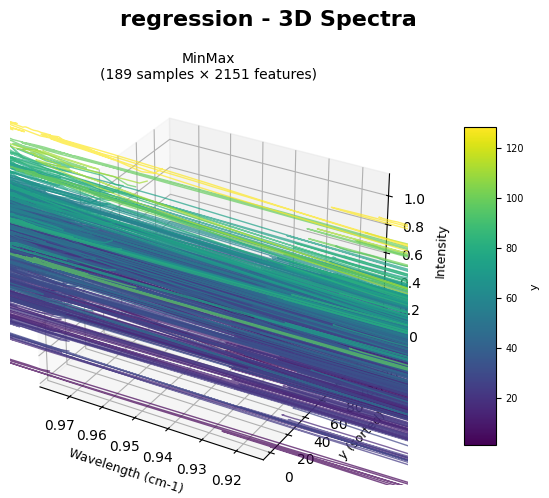

------------------------------------------------------------------------------------------------------------------------
🔷 Step 3: {'y_processing': {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}}
🔹 Executing controller YTransformerMixinController with operator MinMaxScaler
------------------------------------------------------------------------------------------------------------------------
Update: 📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw_MinMaxScaler_1'], min=0.0, max=1.128, mean=0.801, var=0.033)
Targets: (samples=189, targets=1, processings=['numeric', 'numeric_MinMaxScaler1'])
- numeric: min=1.33, max=128.31, mean=30.779
- numeric_MinMaxScaler1: min=-0.006, max=1.0, mean=0.228
Indexes:
- "train", ['raw_MinMaxScaler_1']: 130 samples
- "test", ['raw_MinMaxScaler_1']: 59 samples
-----------------------------------------------------------------------------------------

In [5]:
# Create configuration objects
pipeline_config = PipelineConfigs(simple_pipeline, "Tutorial_1_Simple")
dataset_config = DatasetConfigs(data_path)

# Run the pipeline
print("🏃‍♂️ Running pipeline...")
runner = PipelineRunner(save_files=False, verbose=1, plots_visible=True)
predictions, predictions_per_dataset = runner.run(pipeline_config, dataset_config)

print("✅ Pipeline completed!")
print(f"📊 Generated {len(predictions)} predictions")


In [8]:
t = predictions.top_k(k=3)  # Display top 3 models based on RMSE
print(t[0].summary())  # Summary of the best model

|----------|---------|----------|--------|--------|--------|---------|--------|--------|--------|--------|---------|--------|--------|--------|--------|-------------|
|          | Nsample | Nfeature | Mean   | Median | Min    | Max     | SD     | CV     | R²     | RMSE   | MSE     | SEP    | MAE    | RPD    | Bias   | Consistency |
|----------|---------|----------|--------|--------|--------|---------|--------|--------|--------|--------|---------|--------|--------|--------|--------|-------------|
| Cros Val | 99      | 2151     | 30.309 | 22.360 | 2.050  | 111.200 | 24.543 | 0.810  | 0.667  | 14.162 | 200.551 | 14.160 | 11.093 | 1.73   | 0.178  | 91.9        |
|----------|---------|----------|--------|--------|--------|---------|--------|--------|--------|--------|---------|--------|--------|--------|--------|-------------|


### Step 1.4: Analyze Simple Results

Let's look at the performance of our simple model:

🏆 Best Model Performance:
Model: PLS-10
RMSE: 15.0327


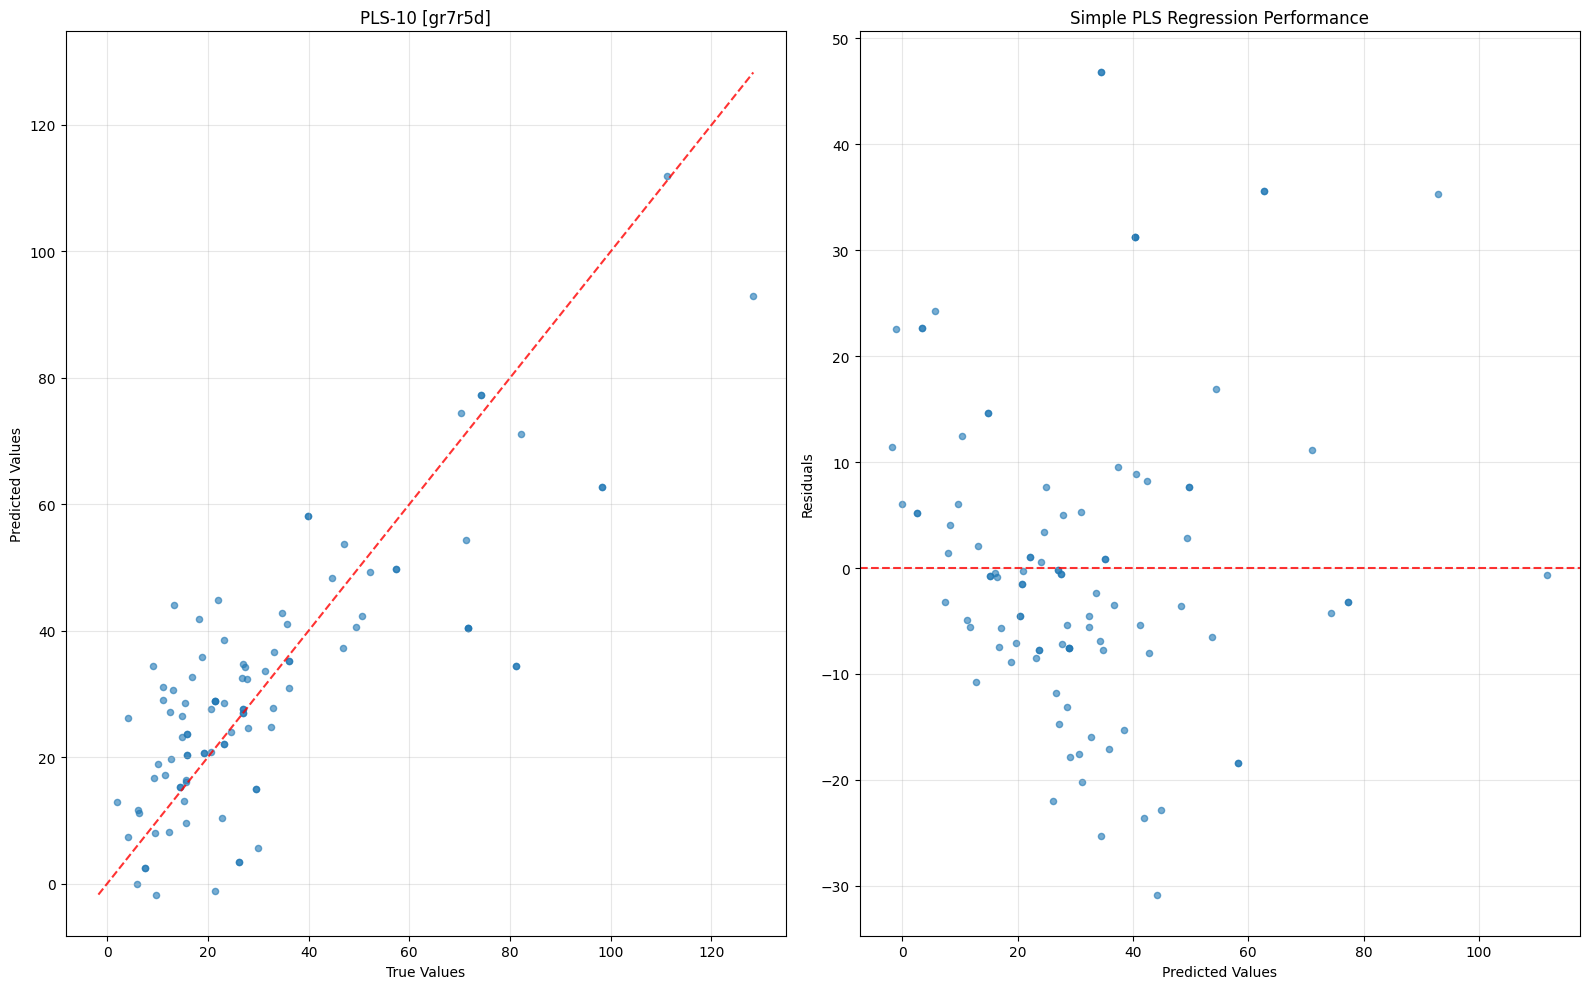

In [ ]:
# Get the best model (we only have one, but this shows the pattern)
best_models = predictions.top_k(1, 'rmse')
best_model = best_models[0]

print("🏆 Best Model Performance:")
print(f"Model: {best_model['model_name']}")
print(f"RMSE: {best_model['rmse']:.4f}")

# Simple visualization
analyzer = PredictionAnalyzer(predictions)
"fig = analyzer.plot_top_k_comparison(k=1, rank_metric='rmse')\n",
plt.title("Simple PLS Regression Performance")
plt.show(block=False)

## Part 2: Enhanced Regression with Preprocessing

NIRS data often benefits from preprocessing. Let's add some spectral preprocessing techniques:

### Step 2.1: Build an Enhanced Pipeline

In [ ]:
# Enhanced pipeline with preprocessing and multiple PLS models
enhanced_pipeline = [
    "chart_2d",  # Visualize raw spectral data
    feature_scaler,
    {"y_processing": target_scaler},

    # Add preprocessing options
    {"feature_augmentation": {
        "_or_": [StandardNormalVariate(), SavitzkyGolay()],  # Try different preprocessing
        "size": [1, 2],  # Try 1 or 2 preprocessing steps
        "count": 3  # Generate 3 combinations
    }},

    cross_validation,
]

# Add multiple PLS models with different component numbers
for n_components in [5, 10, 15, 20]:
    enhanced_pipeline.append({
        "model": PLSRegression(n_components=n_components),
        "name": f"PLS-{n_components}"
    })

print("🔧 Enhanced pipeline with:")
print("   • 2D spectral visualization")
print("   • Multiple preprocessing combinations")
print("   • 4 different PLS models (5, 10, 15, 20 components)")
print(f"   • Total models to test: {4 * 3} = 12")

🔧 Enhanced pipeline with:
   • 2D spectral visualization
   • Multiple preprocessing combinations
   • 4 different PLS models (5, 10, 15, 20 components)
   • Total models to test: 12 = 12


### Step 2.2: Run Enhanced Pipeline

In [ ]:
# Run enhanced pipeline
enhanced_config = PipelineConfigs(enhanced_pipeline, "Tutorial_1_Enhanced")
dataset_config = DatasetConfigs(data_path)

print("🏃‍♂️ Running enhanced pipeline (this will take a bit longer)...")
runner = PipelineRunner(save_files=False, verbose=1)
enhanced_predictions, _ = runner.run(enhanced_config, dataset_config)

print(f"✅ Enhanced pipeline completed with {len(enhanced_predictions)} total predictions!")

🏃‍♂️ Running enhanced pipeline (this will take a bit longer)...
🚀 Starting Nirs4all run(s) with 2 pipeline on 1 dataset (2 total runs).
📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
🚀 Starting pipeline Tutorial_1_Enhanced_902bd8 on dataset regression
------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: chart_2d
🔹 Executing controller SpectraChartController without operator
------------------------------------------------------------------------------------------------------------------------
🔷 Step 2: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller Transfo

### Step 2.3: Compare Enhanced Results

Now let's see how preprocessing and different model configurations perform:

🏆 Top 5 Models with Preprocessing:
1. PLS-20 | RMSE: 10.3199 | Preprocessing: MinMax|MinMax>SG>Std
2. PLS-20 | RMSE: 10.3599 | Preprocessing: MinMax|MinMax>SG>Std
3. PLS-20 | RMSE: 11.1158 | Preprocessing: MinMax|MinMax>Std>SG
4. PLS-20 | RMSE: 11.1227 | Preprocessing: MinMax|MinMax>Std>SG
5. PLS-15 | RMSE: 12.1625 | Preprocessing: MinMax|MinMax>SG>Std


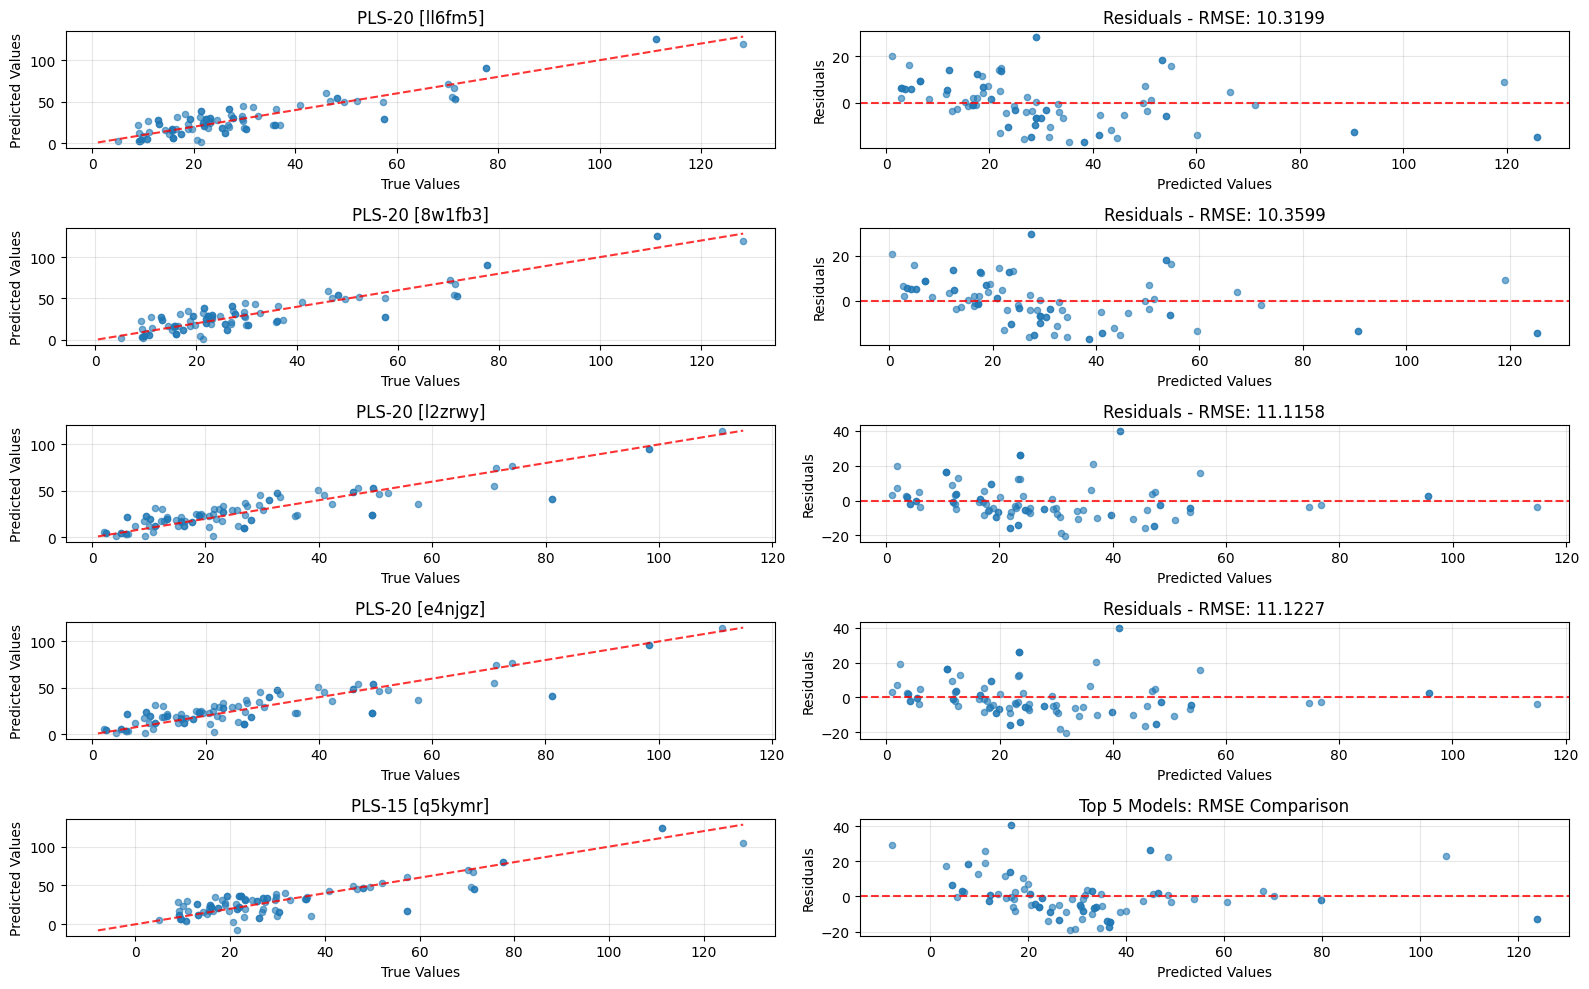

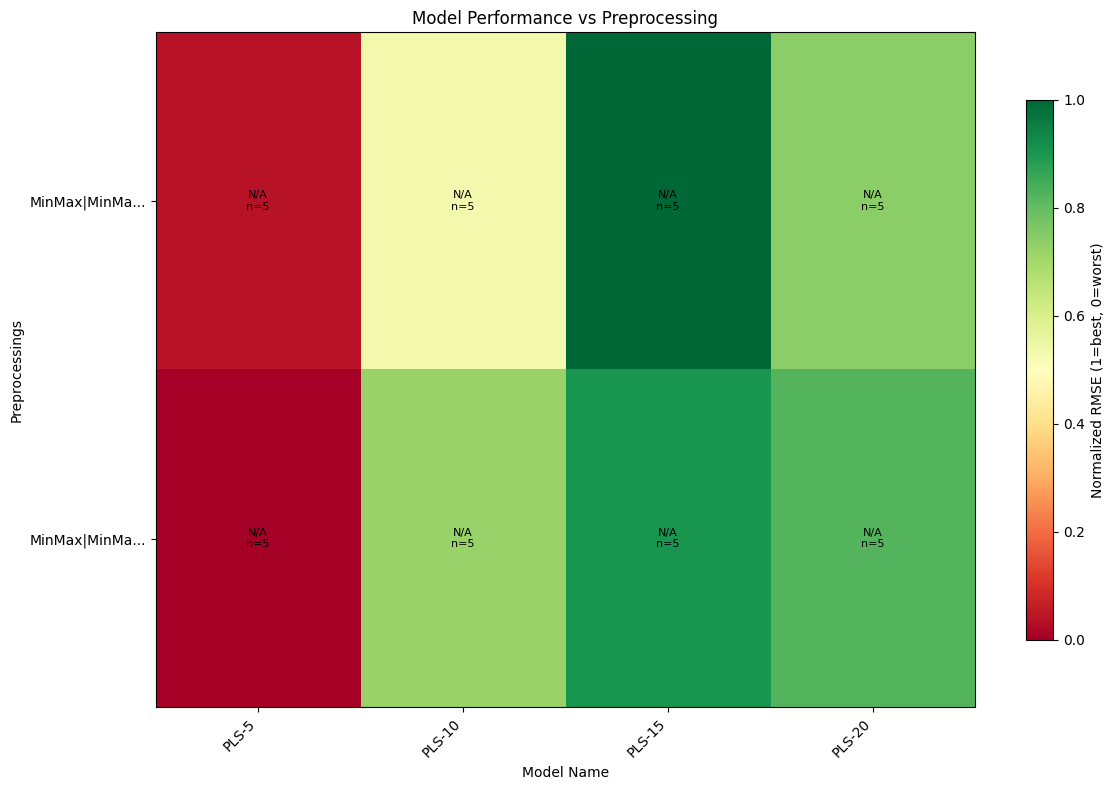

In [ ]:
# Analyze top 5 models
top_models = enhanced_predictions.top_k(5, 'rmse')

print("🏆 Top 5 Models with Preprocessing:")
for idx, model in enumerate(top_models):
    preprocessing = model['preprocessings'] if model['preprocessings'] else 'None'
    print(f"{idx+1}. {model['model_name']} | RMSE: {model['rmse']:.4f} | Preprocessing: {preprocessing}")

# Create enhanced visualizations
analyzer = PredictionAnalyzer(enhanced_predictions)

# Compare top models
fig1 = analyzer.plot_top_k_comparison(k=5, metric='rmse')
plt.title("Top 5 Models: RMSE Comparison")

# Show model vs preprocessing heatmap
fig2 = analyzer.plot_variable_heatmap(
    x_var="model_name",
    y_var="preprocessings",
    metric='rmse'
)
plt.title("Model Performance vs Preprocessing")

plt.show(block=False)

## Part 3: Classification Example

Now let's switch from regression to classification. We'll use Random Forest classifiers:

### Step 3.1: Set Up Classification Pipeline

In [ ]:
# Import classification-specific components
from sklearn.ensemble import RandomForestClassifier

# Classification pipeline
classification_pipeline = [
    feature_scaler,
    cross_validation,
]

# Add Random Forest models with different complexity levels
for max_depth in [5, 10, 15, 20]:
    classification_pipeline.append({
        "model": RandomForestClassifier(max_depth=max_depth, n_estimators=50),
        "name": f"RandomForest-depth-{max_depth}"
    })

print("🌳 Classification pipeline with Random Forest models:")
print("   • Tree depths: 5, 10, 15, 20")
print("   • 50 trees per model")
print("   • Using classification dataset")

🌳 Classification pipeline with Random Forest models:
   • Tree depths: 5, 10, 15, 20
   • 50 trees per model
   • Using classification dataset


### Step 3.2: Run Classification

In [ ]:
# Run classification pipeline
classification_config = PipelineConfigs(classification_pipeline, "Tutorial_1_Classification")
classification_dataset = DatasetConfigs('sample_data/classification')  # Different dataset for classification

print("🏃‍♂️ Running classification pipeline...")
runner = PipelineRunner(save_files=False, verbose=1)
class_predictions, _ = runner.run(classification_config, classification_dataset)

print(f"✅ Classification completed with {len(class_predictions)} predictions!")

🏃‍♂️ Running classification pipeline...
🚀 Starting Nirs4all run(s) with 1 pipeline on 1 dataset (1 total runs).
📊 Dataset: classification (classification)
Features (samples=66, sources=1):
- Source 0: (66, 1, 2152), processings=['raw'], min=-0.032, max=0.948, mean=0.34, var=0.106)
Targets: (samples=66, targets=1, processings=['numeric'])
- numeric: min=0.0, max=9.0, mean=2.894
Indexes:
- "train", ['raw']: 48 samples
- "test", ['raw']: 18 samples
🚀 Starting pipeline Tutorial_1_Classification_823d09 on dataset classification
------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
------------------------------------------------------------------------------------------------------------------------
Update: 📊 Dataset: classification (classification)


### Step 3.3: Analyze Classification Results

For classification, we focus on accuracy and use confusion matrices:

🎯 Top 3 Classification Models:
📈 Predictions: 36 entries
   Datasets: ['classification']
   Configs: ['Tutorial_1_Classification_823d09']
   Models: ['RandomForest-depth-20', 'RandomForest-depth-5', 'RandomForest-depth-10', 'RandomForest-depth-15']
length top_predictions 3


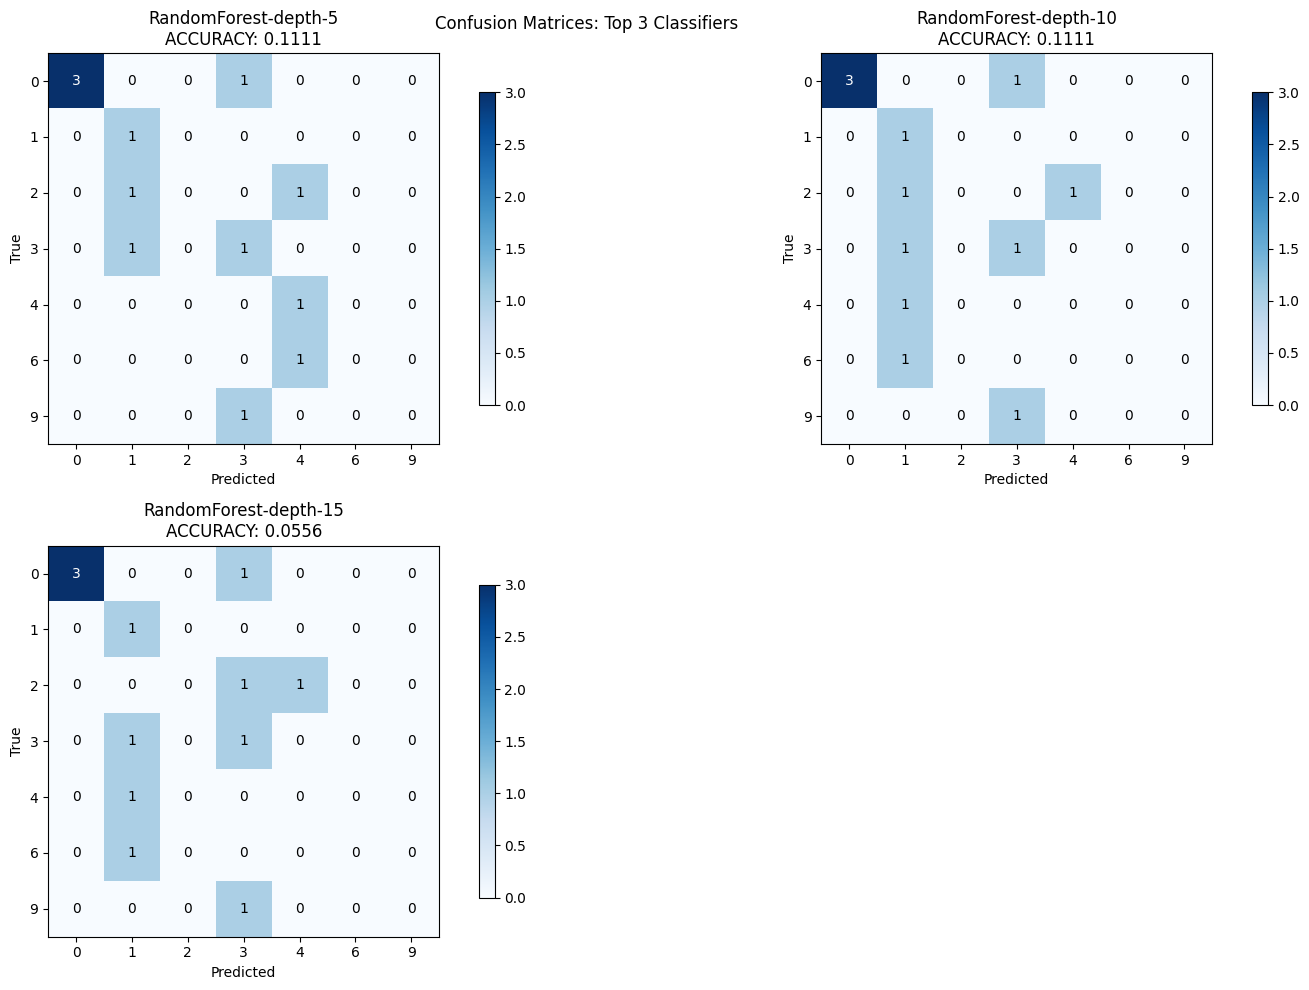

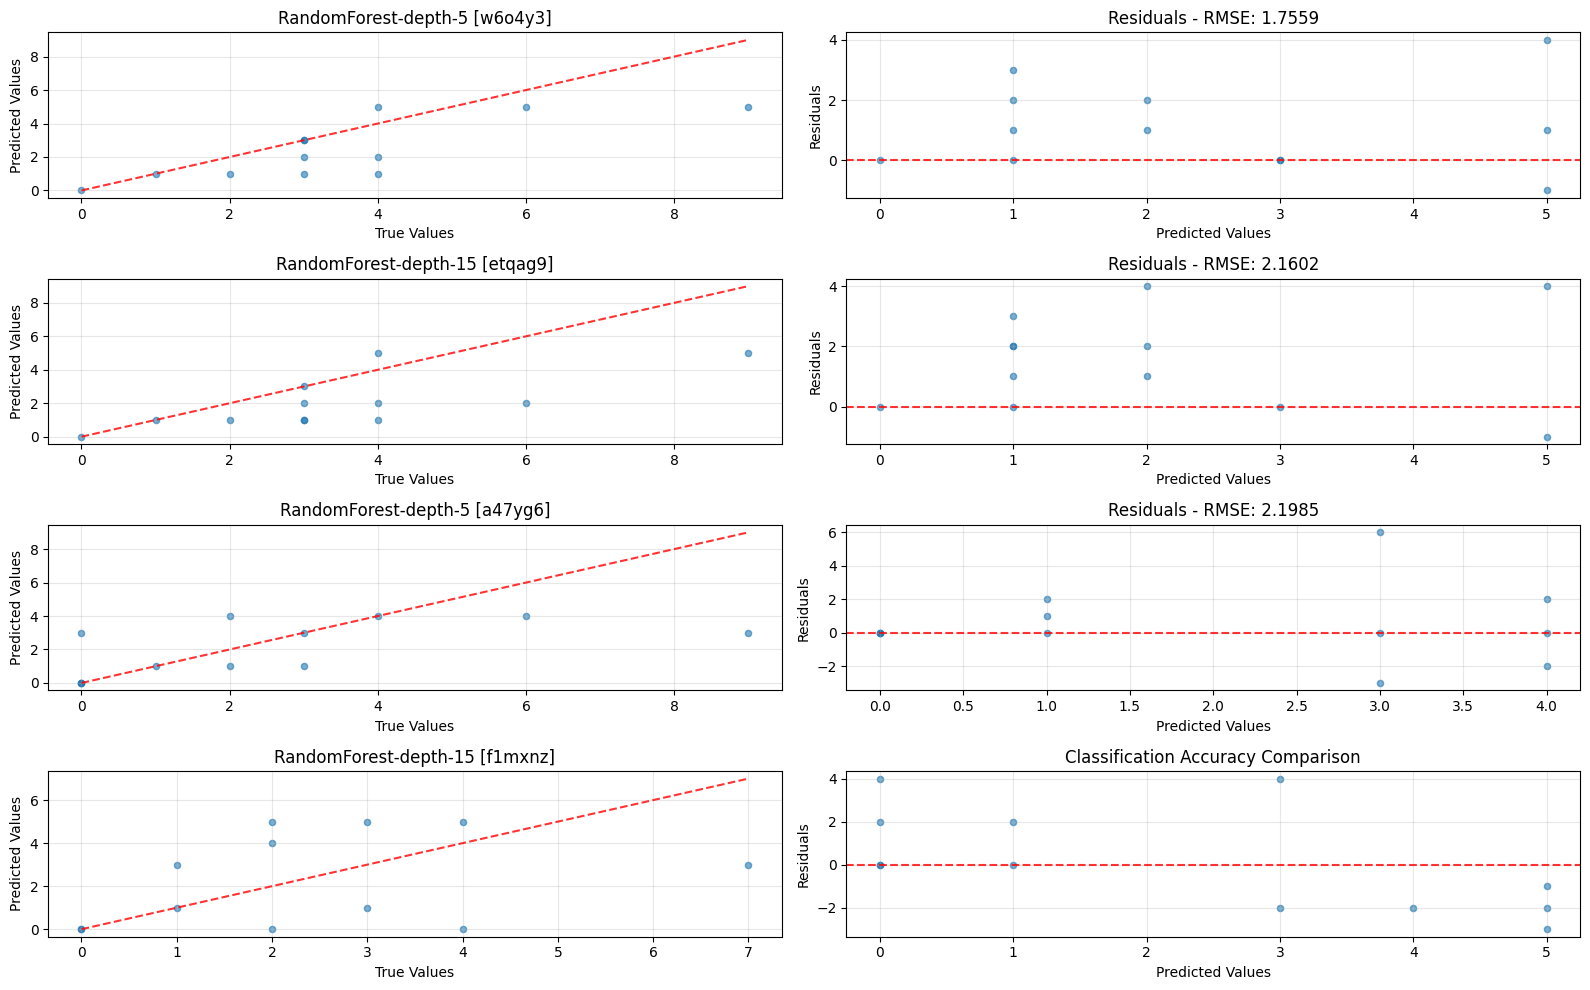

In [ ]:
# Analyze classification results
top_classifiers = class_predictions.top_k(3, 'accuracy')

print("🎯 Top 3 Classification Models:")
for idx, model in enumerate(top_classifiers):
    print(f"{idx+1}. {model['model_name']} | Accuracy: {model['accuracy']:.3f} | Precision: {model['precision']:.3f} | Recall: {model['recall']:.3f}")

# Create classification visualizations
class_analyzer = PredictionAnalyzer(class_predictions)

# Confusion matrices for top models
fig1 = class_analyzer.plot_top_k_confusionMatrix(k=3, metric='accuracy', partition='val')
plt.suptitle("Confusion Matrices: Top 3 Classifiers")

# Accuracy comparison
fig2 = class_analyzer.plot_top_k_comparison(k=4)
plt.title("Classification Accuracy Comparison")

plt.show(block=False)

## Part 4: Model Persistence and Prediction

One of NIRS4All's powerful features is saving trained models for later use:

### Step 4.1: Train and Save Models

In [ ]:
# Simple pipeline for demonstration with model saving
persistent_pipeline = [
    feature_scaler,
    {"y_processing": target_scaler},
    cross_validation,
    {"model": PLSRegression(n_components=15), "name": "SavedPLS-15"},
    {"model": PLSRegression(n_components=10), "name": "SavedPLS-10"},
]

# Run with model saving enabled
persistent_config = PipelineConfigs(persistent_pipeline, "Tutorial_1_Persistent")
dataset_config = DatasetConfigs(data_path)

print("💾 Training models with saving enabled...")
runner = PipelineRunner(save_files=True, verbose=1)  # save_files=True enables model persistence
saved_predictions, _ = runner.run(persistent_config, dataset_config)

# Get the best model for prediction testing
best_saved_model = saved_predictions.top_k(1, 'rmse')[0]
model_id = best_saved_model['id']

print(f"✅ Models saved! Best model ID: {model_id}")
print(f"📊 Best model: {best_saved_model['model_name']} (RMSE: {best_saved_model['rmse']:.4f})")

💾 Training models with saving enabled...
🚀 Starting Nirs4all run(s) with 1 pipeline on 1 dataset (1 total runs).
📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
🚀 Starting pipeline Tutorial_1_Persistent_a874cd on dataset regression
------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
------------------------------------------------------------------------------------------------------------------------
Update: 📊 Dataset: regression (regression)
Features (sam

### Step 4.2: Use Saved Model for Prediction

🔮 Making predictions with saved model gtin48...
🚀 Starting Nirs4all prediction(s)
🔍 Loading results\regression\Tutorial_1_Persistent_a874cd\pipeline.json, results\regression\Tutorial_1_Persistent_a874cd\metadata.json
🔍 5 binaries found
🚀 Starting pipeline prediction on dataset regression_2
------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler'}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
------------------------------------------------------------------------------------------------------------------------
Update: 📊 Dataset: regression_2 (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw_MinMaxScaler_1'], min=0.0, max=1.128, mean=0.801, var=0.033)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw_MinMaxSca

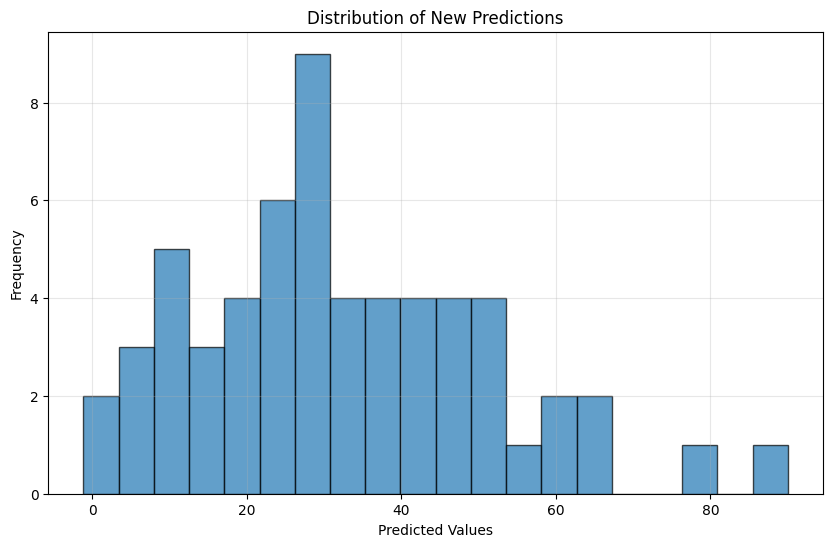

In [ ]:
# Create a prediction dataset (we'll use a different regression dataset)
prediction_dataset = DatasetConfigs('sample_data/regression_2')

# Use the saved model to make predictions
print(f"🔮 Making predictions with saved model {model_id}...")
predictor = PipelineRunner(save_files=False, verbose=1)
new_predictions, _ = predictor.predict(model_id, prediction_dataset, verbose=1)

print(f"✅ Generated {len(new_predictions)} new predictions!")
print(f"📈 Prediction range: {new_predictions.min():.3f} to {new_predictions.max():.3f}")
print(f"📊 Mean prediction: {new_predictions.mean():.3f}")

# Simple visualization of predictions
plt.figure(figsize=(10, 6))
plt.hist(new_predictions.flatten(), bins=20, alpha=0.7, edgecolor='black')
plt.title("Distribution of New Predictions")
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show(block=False)

## Part 5: Data Visualization Deep Dive

Let's explore NIRS4All's powerful visualization capabilities:

### Step 5.1: Create a Rich Analysis Pipeline

In [ ]:
# Import additional transformations for more interesting visualizations
from nirs4all.operators.transformations import (
    Detrend, FirstDerivative, Gaussian, MultiplicativeScatterCorrection
)

# Rich pipeline for visualization
viz_pipeline = [
    # "chart_2d",  # 2D spectral plot
    feature_scaler,
    {"y_processing": target_scaler},

    # More preprocessing options for interesting heatmaps
    {"feature_augmentation": {
        "_or_": [
            StandardNormalVariate(),
            SavitzkyGolay(),
            Detrend(),
            FirstDerivative(),
            MultiplicativeScatterCorrection()
        ],
        "size": [1, 2],
        "count": 6
    }},

    cross_validation,
    "fold_chart"
]

# Add diverse models for interesting comparisons
for n_comp in [8, 12, 16, 20]:
    viz_pipeline.append({"model": PLSRegression(n_components=n_comp), "name": f"PLS-{n_comp}"})

print("📊 Rich visualization pipeline with:")
print("   • 5 preprocessing techniques")
print("   • 6 preprocessing combinations")
print("   • 4 PLS models")
print(f"   • Total: {4 * 6} = 24 model configurations")

📊 Rich visualization pipeline with:
   • 5 preprocessing techniques
   • 6 preprocessing combinations
   • 4 PLS models
   • Total: 24 = 24 model configurations


### Step 5.2: Run Rich Analysis

In [ ]:
# Run rich pipeline
viz_config = PipelineConfigs(viz_pipeline, "Tutorial_1_Visualization")
dataset_config = DatasetConfigs(data_path)

print("🏃‍♂️ Running rich analysis pipeline...")
runner = PipelineRunner(save_files=False, verbose=1)
viz_predictions, _ = runner.run(viz_config, dataset_config)

print(f"✅ Rich analysis completed with {len(viz_predictions)} predictions!")

🏃‍♂️ Running rich analysis pipeline...
🚀 Starting Nirs4all run(s) with 6 pipeline on 1 dataset (6 total runs).
📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
🚀 Starting pipeline Tutorial_1_Visualization_b361d9 on dataset regression
------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
------------------------------------------------------------------------------------------------------------------------
Update: 📊 Dataset: regression (regression)
Features (sa

### Step 5.3: Create Comprehensive Visualizations

📊 Creating visualization 1/4: Top Models Comparison
📊 Creating visualization 2/4: Model vs Preprocessing Heatmap
📊 Creating visualization 3/4: Simplified Performance Heatmap
📊 Creating visualization 4/4: Performance Distribution


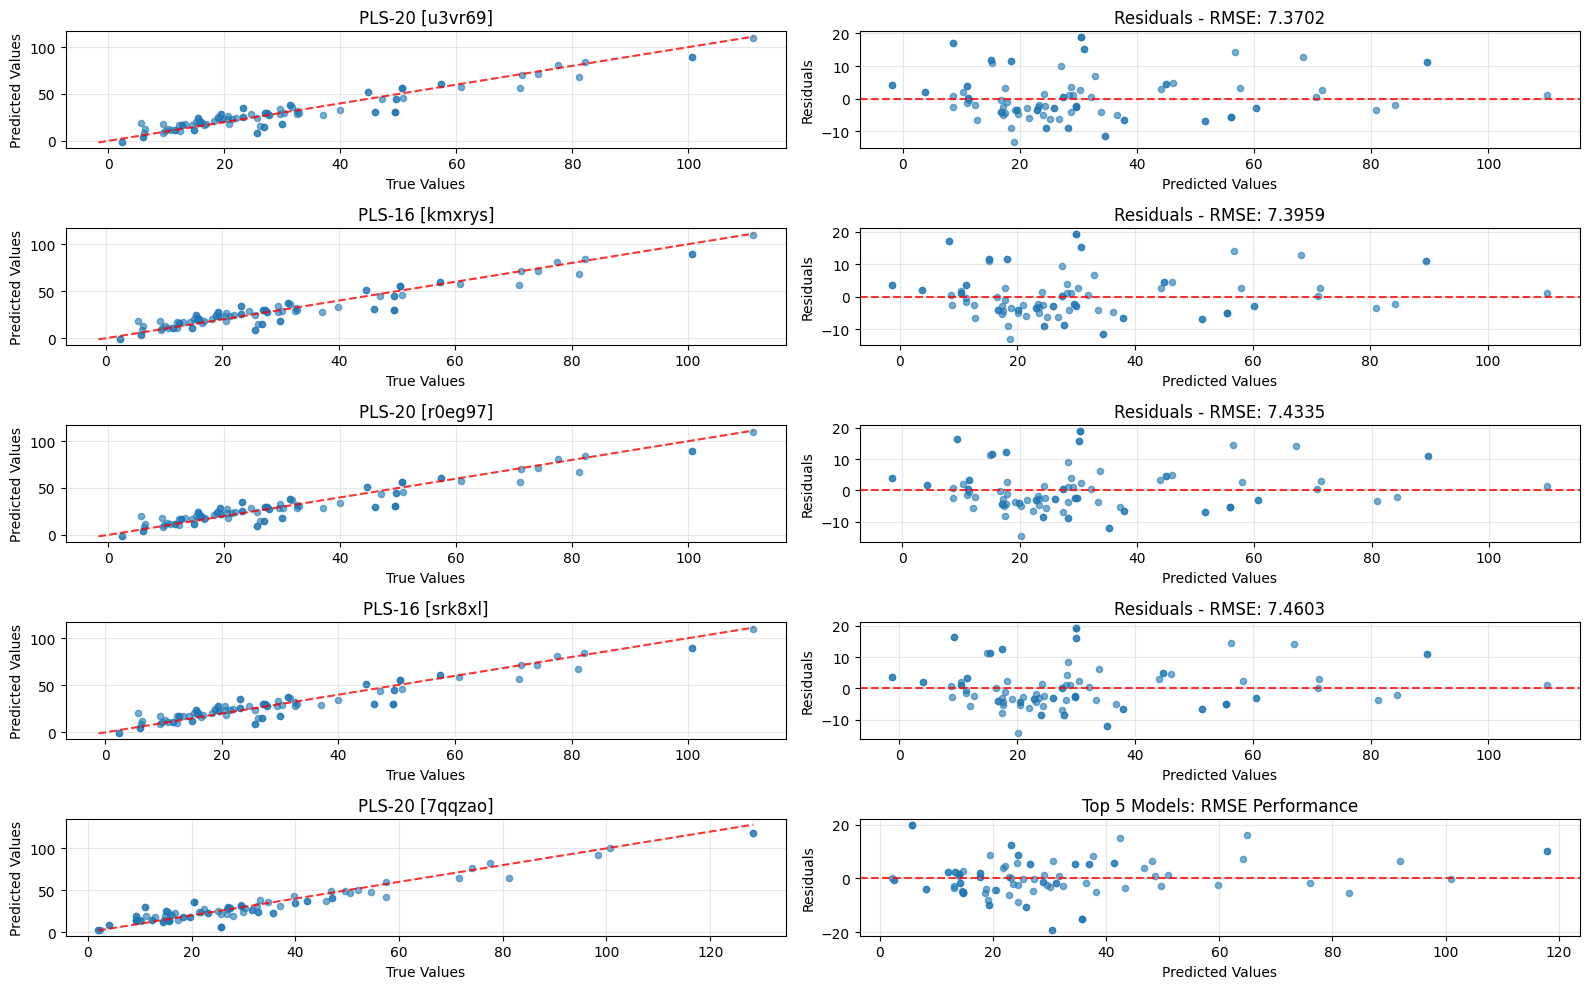

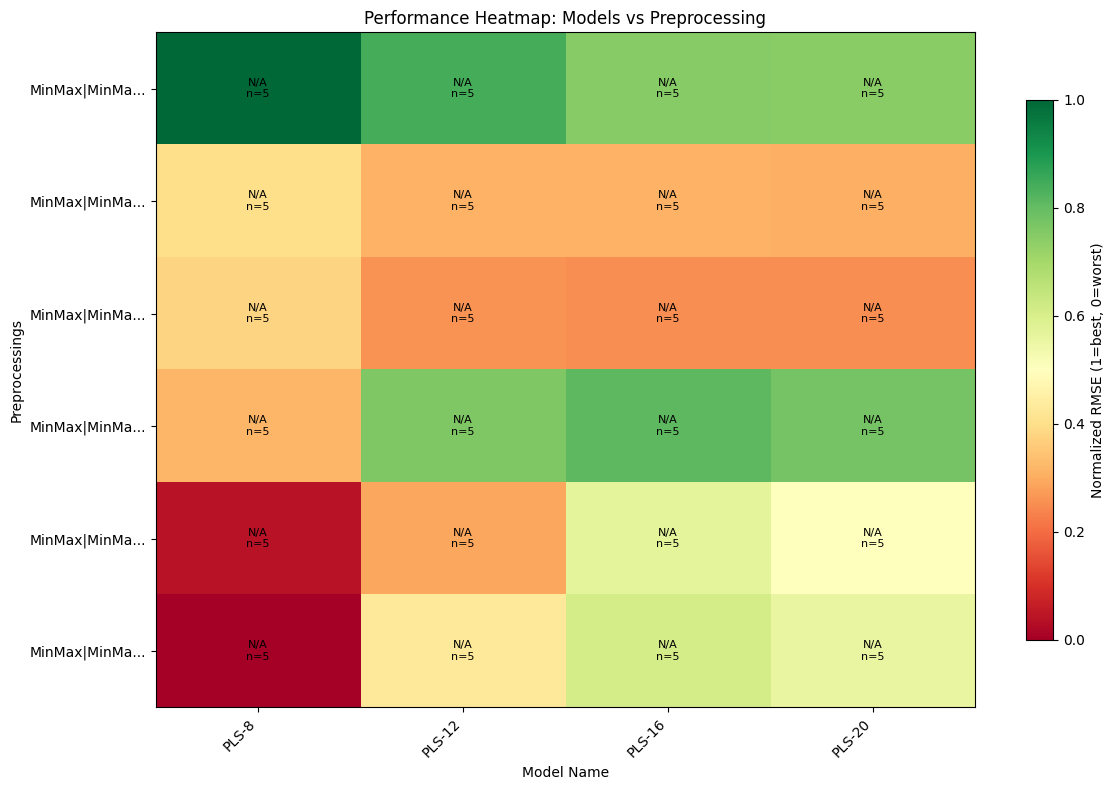

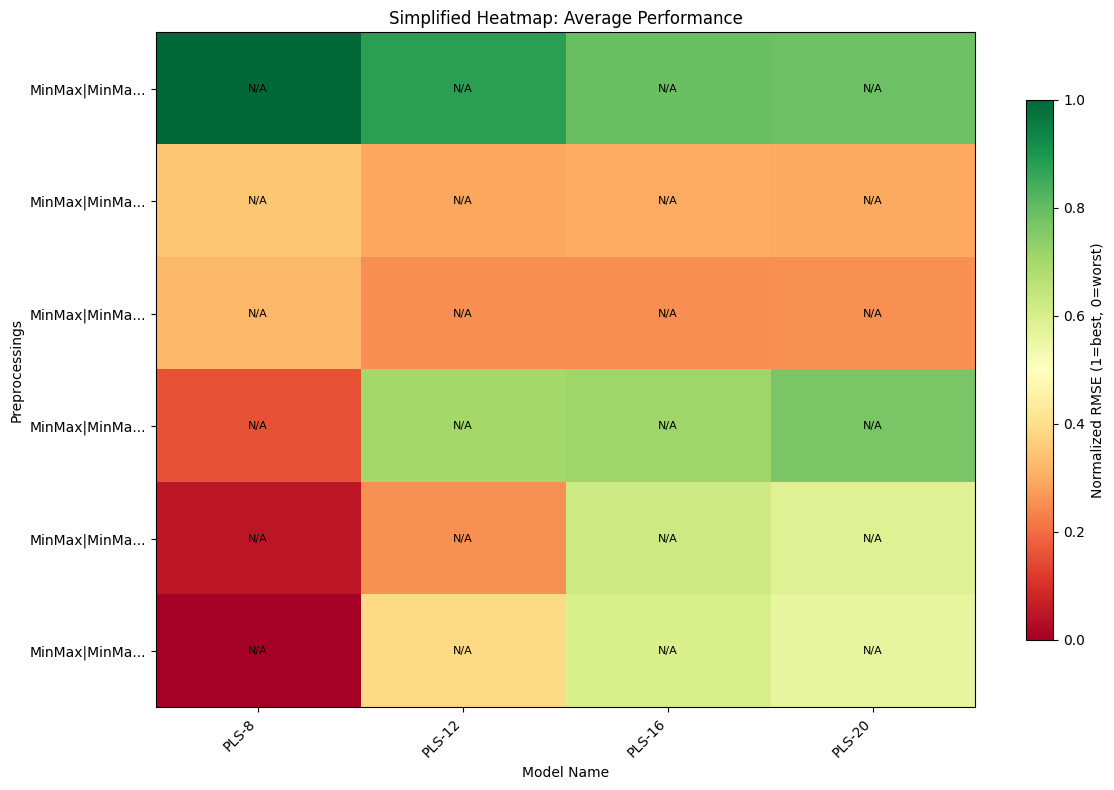

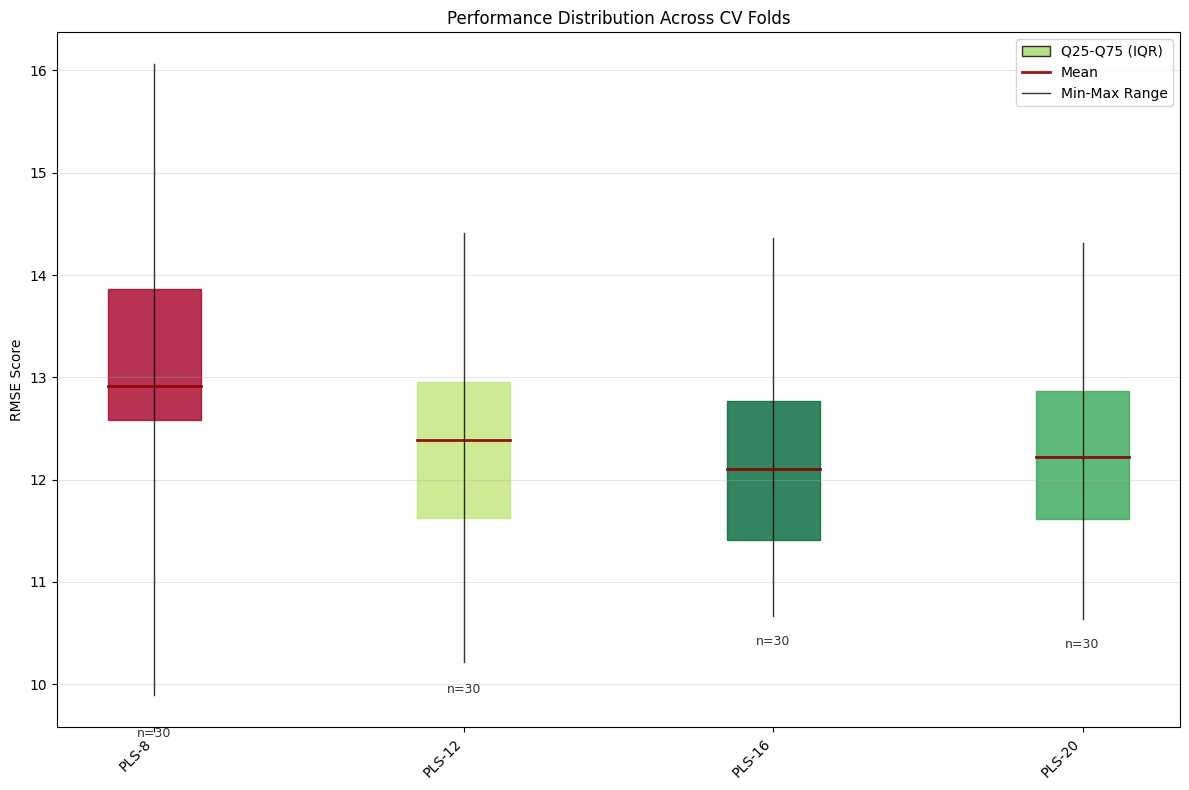

🎨 All visualizations created successfully!


In [ ]:
# Create comprehensive visualizations
viz_analyzer = PredictionAnalyzer(viz_predictions)

# 1. Top models comparison
print("📊 Creating visualization 1/4: Top Models Comparison")
fig1 = viz_analyzer.plot_top_k_comparison(k=5, metric='rmse')
plt.title("Top 5 Models: RMSE Performance")

# 2. Model vs Preprocessing heatmap
print("📊 Creating visualization 2/4: Model vs Preprocessing Heatmap")
fig2 = viz_analyzer.plot_variable_heatmap(
    x_var="model_name",
    y_var="preprocessings",
    metric='rmse',
    best_only=False
)
plt.title("Performance Heatmap: Models vs Preprocessing")

# 3. Simplified heatmap (average performance)
print("📊 Creating visualization 3/4: Simplified Performance Heatmap")
fig3 = viz_analyzer.plot_variable_heatmap(
    x_var="model_name",
    y_var="preprocessings",
    metric='rmse',
    display_n=False  # Hide count numbers for cleaner view
)
plt.title("Simplified Heatmap: Average Performance")

# 4. Performance distribution (candlestick)
print("📊 Creating visualization 4/4: Performance Distribution")
fig4 = viz_analyzer.plot_variable_candlestick(
    filters={"partition": "test"},
    variable="model_name"
)
plt.title("Performance Distribution Across CV Folds")

plt.show(block=False)

print("🎨 All visualizations created successfully!")

## Part 6: Multiple Datasets Analysis

Sometimes you want to test the same pipeline across multiple datasets to see how models generalize. Let's run our pipeline on different datasets:

### Step 6.1: Configure Multiple Datasets

In [ ]:
# Test the same pipeline across multiple datasets
multi_datasets = ['sample_data/regression', 'sample_data/regression_2', 'sample_data/regression_3']
multi_dataset_config = DatasetConfigs(multi_datasets)

# Use our enhanced pipeline from earlier
print(f"🏃‍♂️ Running pipeline across {len(multi_datasets)} different datasets...")
runner = PipelineRunner(save_files=False, verbose=1, plots_visible=False)
multi_predictions, predictions_per_dataset = runner.run(enhanced_config, multi_dataset_config)

print(f"✅ Multi-dataset analysis completed!")
print(f"📊 Total predictions: {len(multi_predictions)}")
print(f"📁 Datasets analyzed: {len(predictions_per_dataset)}")

🏃‍♂️ Running pipeline across 3 different datasets...
🚀 Starting Nirs4all run(s) with 2 pipeline on 3 dataset (6 total runs).
📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
🚀 Starting pipeline Tutorial_1_Enhanced_902bd8 on dataset regression
------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: chart_2d
🔹 Executing controller SpectraChartController without operator
------------------------------------------------------------------------------------------------------------------------
🔷 Step 2: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinCo

### Step 6.2: Analyze Results Per Dataset

Let's see how our models perform on each dataset:

In [ ]:
# Analyze results per dataset
print("📊 Performance Analysis per Dataset:")
print("=" * 60)

for dataset_name, dataset_result in predictions_per_dataset.items():
    dataset_predictions = dataset_result['run_predictions']
    top_3 = dataset_predictions.top_k(3, 'rmse')

    print(f"\n🗂️  Dataset: {dataset_name}")
    print(f"   Total predictions: {len(dataset_predictions)}")
    print("   Top 3 models:")

    for idx, model in enumerate(top_3):
        preprocessing = model['preprocessings'] if model['preprocessings'] else 'None'
        print(f"     {idx+1}. {model['model_name']} | RMSE: {model['rmse']:.4f}")
        print(f"        Preprocessing: {preprocessing}")

# Overall best across all datasets
print("\n🏆 Overall Best Models Across All Datasets:")
overall_top = multi_predictions.top_k(5, 'rmse')
for idx, model in enumerate(overall_top):
    print(f"{idx+1}. {model['model_name']} | Dataset: {model['dataset_name']} | RMSE: {model['rmse']:.4f}")

📊 Performance Analysis per Dataset:

🗂️  Dataset: regression
   Total predictions: 120
   Top 3 models:
     1. PLS-20 | RMSE: 9.6390
        Preprocessing: MinMax|MinMax>SG>Std
     2. PLS-20 | RMSE: 9.7110
        Preprocessing: MinMax|MinMax>SG>Std
     3. PLS-20 | RMSE: 9.8609
        Preprocessing: MinMax|MinMax>Std>SG

🗂️  Dataset: regression_2
   Total predictions: 120
   Top 3 models:
     1. PLS-20 | RMSE: 9.0697
        Preprocessing: MinMax|MinMax>Std>SG
     2. PLS-20 | RMSE: 9.1750
        Preprocessing: MinMax|MinMax>Std>SG
     3. PLS-20 | RMSE: 10.3435
        Preprocessing: MinMax|MinMax>SG>Std

🗂️  Dataset: regression_3
   Total predictions: 120
   Top 3 models:
     1. PLS-20 | RMSE: 11.3414
        Preprocessing: MinMax|MinMax>SG>Std
     2. PLS-20 | RMSE: 11.3431
        Preprocessing: MinMax|MinMax>SG>Std
     3. PLS-20 | RMSE: 11.5003
        Preprocessing: MinMax|MinMax>Std>SG

🏆 Overall Best Models Across All Datasets:
1. PLS-20 | Dataset: regression_2 | RMSE: 

### Step 6.3: Multi-Dataset Visualizations

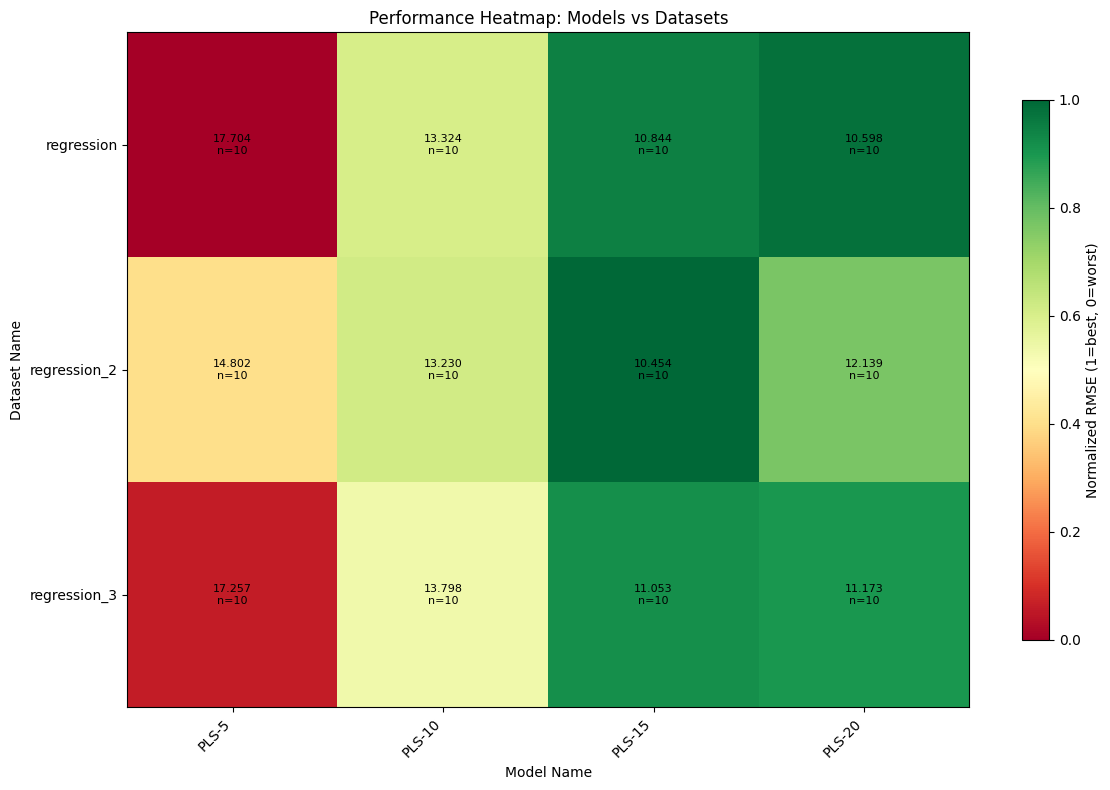

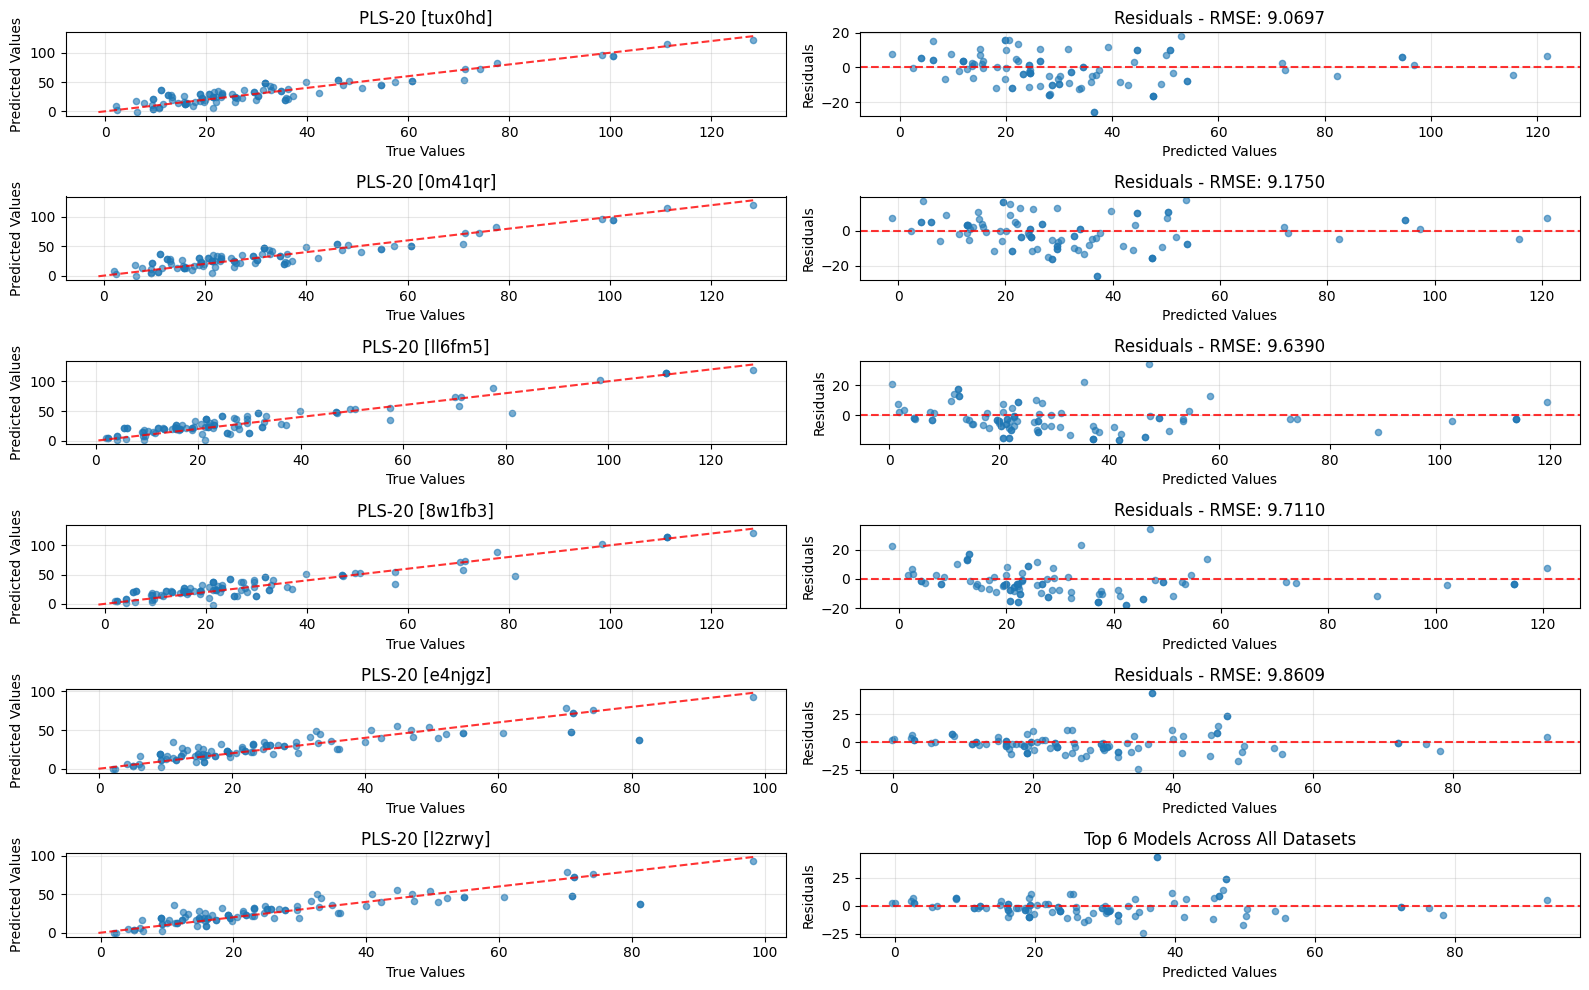

🎨 Multi-dataset visualizations completed!


In [ ]:
# Create multi-dataset visualizations
multi_analyzer = PredictionAnalyzer(multi_predictions)

# Performance across datasets
fig1 = multi_analyzer.plot_variable_heatmap(
    x_var="model_name",
    y_var="dataset_name",
    metric='rmse'
)
plt.title("Performance Heatmap: Models vs Datasets")

# Top models comparison across datasets
fig2 = multi_analyzer.plot_top_k_comparison(k=6, metric='rmse')
plt.title("Top 6 Models Across All Datasets")

plt.show(block=False)
print("🎨 Multi-dataset visualizations completed!")

## Summary and Next Steps

🎉 **Congratulations!** You've completed the NIRS4All Beginner's Guide!

### What You've Learned:
1. ✅ **Basic PLS Regression** - Built and ran your first NIRS pipeline
2. ✅ **Enhanced Preprocessing** - Used spectral preprocessing for better results
3. ✅ **Classification** - Applied Random Forest for classification tasks
4. ✅ **Model Persistence** - Saved and reused trained models
5. ✅ **Data Visualization** - Created comprehensive performance visualizations

### Key NIRS4All Concepts:
- **Pipelines**: Sequential data processing steps
- **Feature Augmentation**: Automatic preprocessing combinations
- **Cross-Validation**: Robust model evaluation
- **Model Persistence**: Save/load trained models
- **Prediction Analysis**: Rich visualization tools

### Ready for More?
Check out **Tutorial 2: Advanced NIRS Analysis** to learn about:
- Multi-source data analysis
- Hyperparameter optimization
- Custom configuration generation
- Advanced visualization techniques
- Neural network models

### Tips for Your Own Projects:
1. 🔍 Start simple, then add complexity
2. 📊 Always visualize your results
3. 🔄 Use cross-validation for reliable estimates
4. 💾 Save your best models for reuse
5. 🧪 Experiment with different preprocessing techniques

Happy analyzing! 🚀